In [1]:
#This example is based on the work of Luiz Schiller: Investigating the Titanic Dataset with Python. 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns

#matplotlib inline

filename = 'titanic_full.csv'
titanic_df = pd.read_csv(filename)

In [4]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0


In [5]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  WikiId       1304 non-null   float64
 13  Name_wiki    1304 non-null   object 
 14  Age_wiki     1302 non-null   float64
 15  Hometown     1304 non-null   object 
 16  Boarded      1304 non-null   object 
 17  Destination  1304 non-null   object 
 18  Lifeboat     502 non-null    object 
 19  Body  

survival: Survival (0 = No; 1 = Yes)
pclass: Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
name: Name
sex: Sex
age: Age
sibsp: Number of Siblings/Spouses Aboard
parch: Number of Parents/Children Aboard
ticket: Ticket Number
fare: Passenger Fare
cabin: Cabin
embarked: Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
Variable Notes

In [2]:
    #Let us create a new columnn which identifies presence of family
    titanic_df['Family'] = (titanic_df['SibSp'] > 0) | (titanic_df['Parch'] > 0)

In [3]:
#this column identifies the passenger as a child or adult
titanic_df['AgeRange'] = pd.cut(titanic_df['Age'], [0, 15, 80], labels=['child', 'adult'])

In [4]:
#We will trim the data to what we are about to explore
titanic_df.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin','WikiId','Age_wiki'], axis=1, inplace=True)

In [5]:
titanic_df.describe()

,Survived,Pclass,Age,Fare,Class
count,891.000000,1309.000000,1046.000000,1308.000000,1304.000000
mean,0.383838,2.294882,29.881138,33.295479,2.291411
std,0.486592,0.837836,14.413493,51.758668,0.840852
min,0.000000,1.000000,0.170000,0.000000,1.000000
25%,0.000000,2.000000,21.000000,7.895800,1.750000
50%,0.000000,3.000000,28.000000,14.454200,3.000000
75%,1.000000,3.000000,39.000000,31.275000,3.000000
max,1.000000,3.000000,80.000000,512.329200,3.000000


Let’s raise some questions:
What is the survival rate by class, sex and age? What about combining these factors?
Was the fare the same for men and women?
What fraction of the passengers embarked on each port? Is there a difference in their survival rates?
Is the presence of a family member a good indicator for survival?

In [10]:
titanic_df_clean_age = titanic_df.dropna(subset=['Age'])

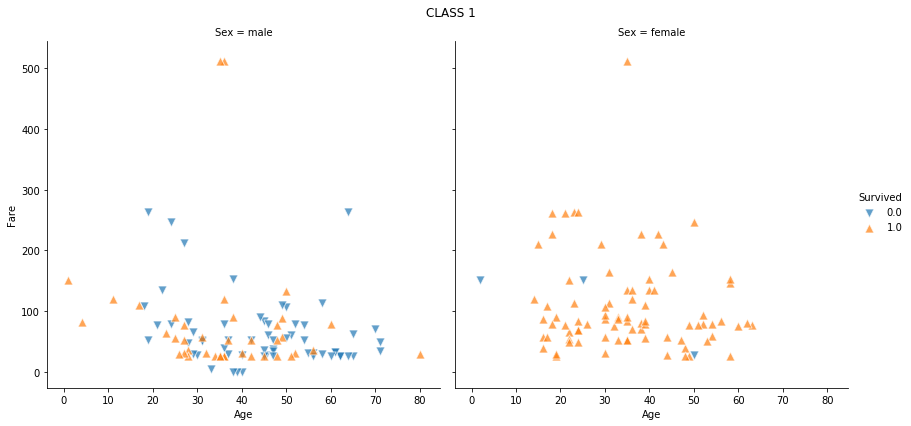

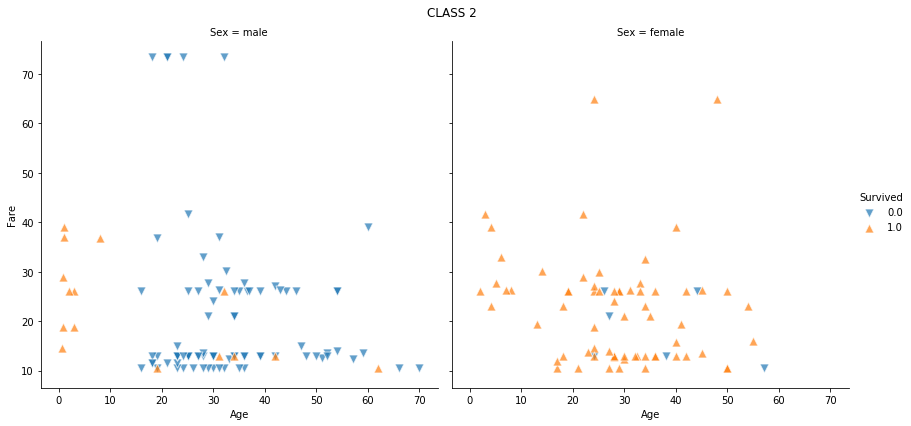

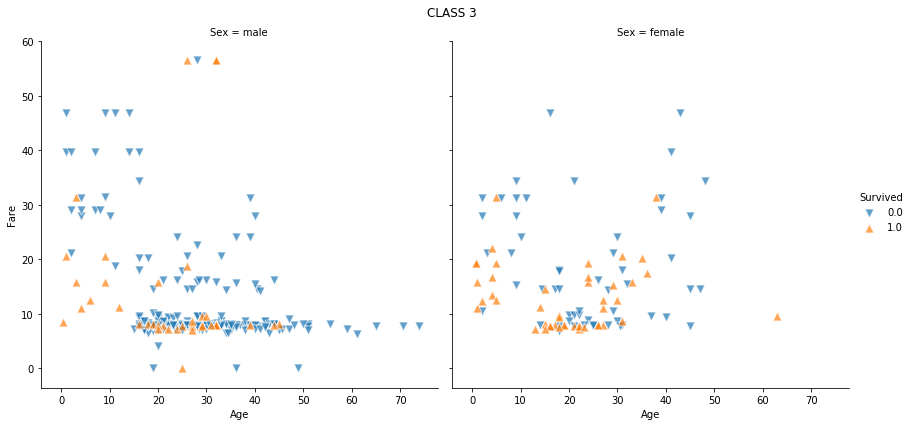

In [37]:
def scatter_plot_class(pclass):
    g = sns.FacetGrid(titanic_df_clean_age[titanic_df_clean_age['Pclass'] == pclass], 
                      col='Sex',
                      col_order=['male', 'female'],
                      hue='Survived', 
                      hue_kws=dict(marker=['v', '^']), 
                      height=6)
    g = (g.map(plt.scatter, 'Age', 'Fare', edgecolor='w', alpha=0.7, s=80).add_legend())
    plt.subplots_adjust(top=0.9)
    g.fig.suptitle('CLASS {}'.format(pclass))

# plotted separately because the fare scale for the first class makes it difficult to visualize second and third class charts
scatter_plot_class(1)
scatter_plot_class(2)
scatter_plot_class(3)

In [11]:
survived_by_class = titanic_df_clean_age.groupby('Pclass')['Survived'].mean()
survived_by_class

Pclass
1    0.655914
2    0.479769
3    0.239437
Name: Survived, dtype: float64

In [39]:
survived_by_sex = titanic_df_clean_age.groupby('Sex')['Survived'].mean()
survived_by_sex

Sex
female    0.754789
male      0.205298
Name: Survived, dtype: float64

In [40]:
survived_by_age = titanic_df_clean_age.groupby('AgeRange')['Survived'].mean()
survived_by_age

AgeRange
child    0.590361
adult    0.381933
Name: Survived, dtype: float64

(0.0, 1.0)

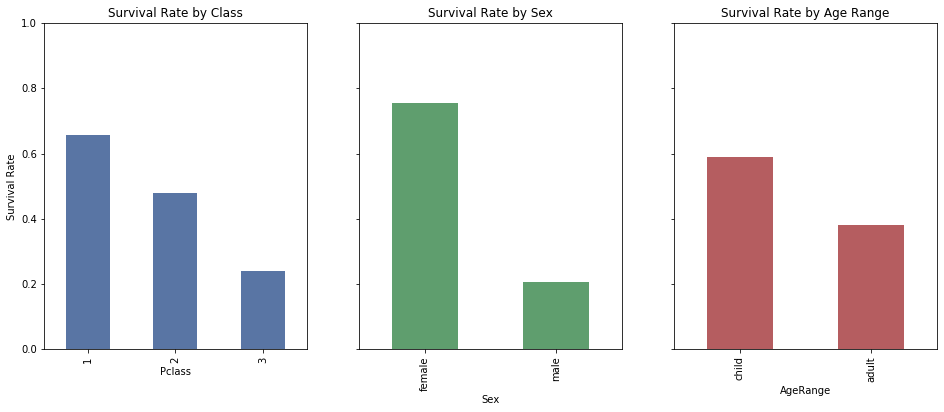

In [41]:
fig, (axis1,axis2,axis3) = plt.subplots(1, 3, figsize=(16,6))

ax = survived_by_class.plot.bar(ax=axis1, color='#5975A4', title='Survival Rate by Class', sharey=True)
ax.set_ylabel('Survival Rate')
ax.set_ylim(0.0,1.0)
ax = survived_by_sex.plot.bar(ax=axis2, color='#5F9E6E', title='Survival Rate by Sex', sharey=True)
ax.set_ylim(0.0,1.0)
ax = survived_by_age.plot.bar(ax=axis3, color='#B55D60', title='Survival Rate by Age Range', sharey=True)
ax.set_ylim(0.0,1.0)

In [42]:
grouped_data = pd.concat(
    [titanic_df_clean_age.groupby(['Pclass', 'Sex', 'AgeRange'])['Survived'].mean(),
     titanic_df_clean_age.groupby(['Pclass', 'Sex', 'AgeRange'])['Survived'].count()],
    axis=1)
grouped_data.columns = ['Survived', 'Count']
grouped_data

Survived  Count
Pclass Sex    AgeRange                 
1      female child     0.666667      3
              adult     0.975610     82
       male   child     1.000000      3
              adult     0.377551     98
2      female child     1.000000     10
              adult     0.906250     64
       male   child     1.000000      9
              adult     0.066667     90
3      female child     0.533333     30
              adult     0.430556     72
       male   child     0.321429     28
              adult     0.128889    225

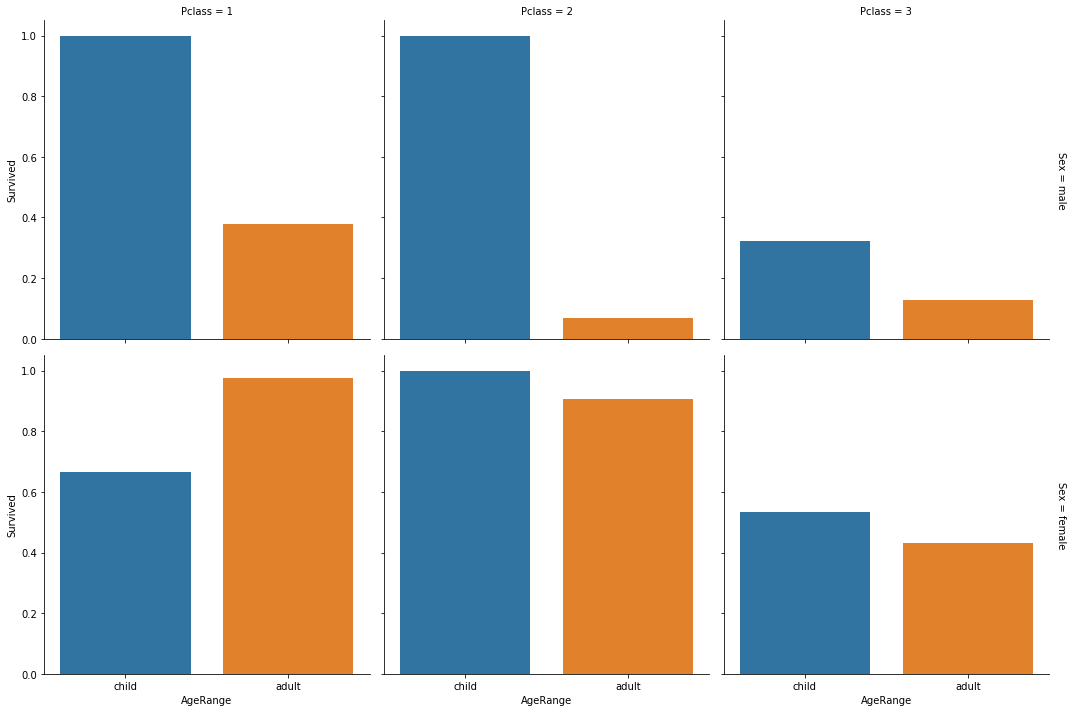

In [43]:
g = sns.catplot(
    x='AgeRange', 
    y='Survived', 
    col='Pclass',
    row='Sex',
    data=titanic_df_clean_age,
    margin_titles=True, 
    kind="bar", 
    ci=None)

In [44]:
#Was the fare the same for men and for women? Is the misleading?
fare_by_sex = titanic_df.groupby('Sex')['Fare'].mean()
fare_by_sex

Sex
female    46.198097
male      26.154601
Name: Fare, dtype: float64

Text(0, 0.5, 'Average Fare')

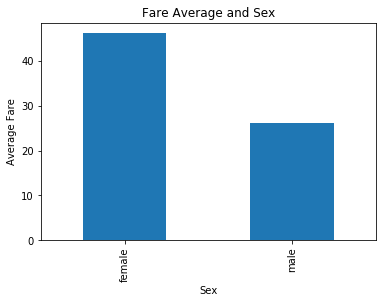

In [45]:
ax = fare_by_sex.plot.bar(title='Fare Average and Sex')
ax.set_ylabel('Average Fare')

In [46]:
fare_by_class_sex = titanic_df.groupby(['Pclass', 'Sex'])['Fare'].mean()
fare_by_class_sex

Pclass  Sex   
1       female    109.412385
        male       69.888385
2       female     23.234827
        male       19.904946
3       female     15.324250
        male       12.415462
Name: Fare, dtype: float64

Text(0, 0.5, 'Average Fare')

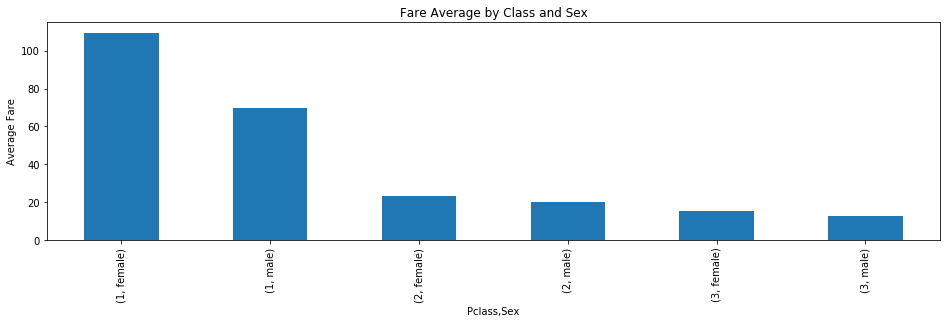

In [47]:
ax = fare_by_class_sex.plot.bar(figsize=(16,4), title='Fare Average by Class and Sex')
ax.set_ylabel('Average Fare')

In [48]:
#Does the survival rate depend on the port passengers embarked on the trip?
#(C = Cherbourg; Q = Queenstown; S = Southampton)b
titanic_df_clean_embarked = titanic_df.dropna(subset=['Embarked'])
embarked = titanic_df_clean_embarked.groupby('Embarked').mean()
embarked['Count'] = titanic_df_clean_embarked['Embarked'].value_counts()
embarked

,Survived,Pclass,Age,Fare,Class,Count
Embarked,,,,,,
C,0.553571,1.851852,32.332170,62.336267,1.846442,270
Q,0.389610,2.894309,28.630000,12.409012,2.894309,123
S,0.336957,2.347921,29.245205,27.418824,2.343202,914


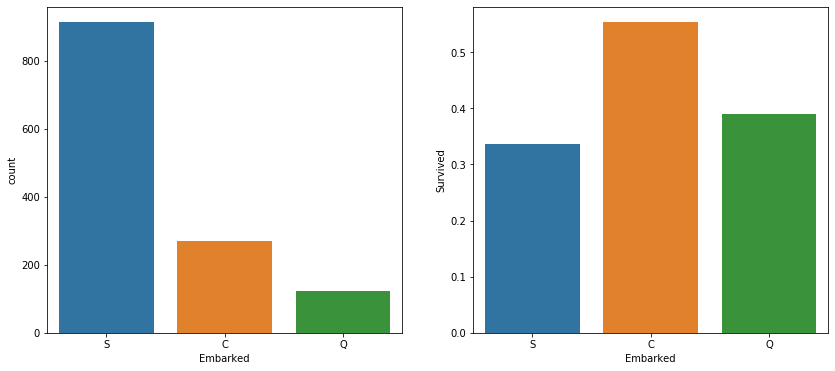

In [49]:
ig, (axis1,axis2) = plt.subplots(1, 2, figsize=(14,6))

sns.countplot(x='Embarked', data=titanic_df_clean_embarked, order=['S','C','Q'], ax=axis1)
sns.barplot(x=embarked.index, y='Survived', data=embarked, order=['S','C','Q'], ax=axis2)

In [12]:
#Does having a family member on board help one survive?
survived_by_family = titanic_df_clean_age.groupby('Family')['Survived'].mean()
survived_by_family

Family
False    0.321782
True     0.516129
Name: Survived, dtype: float64

Text(0, 0.5, 'Survival Rate')

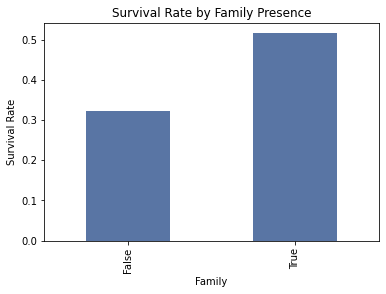

In [13]:
ax = survived_by_family.plot.bar(color='#5975A4', title='Survival Rate by Family Presence')
ax.set_ylabel('Survival Rate')

In [14]:
family_by_class = titanic_df_clean_age.groupby('Pclass')['Family'].mean()
family_by_class

Pclass
1    0.549296
2    0.455939
3    0.361277
Name: Family, dtype: float64

In [15]:
family_by_sex = titanic_df_clean_age.groupby('Sex')['Family'].mean()
family_by_sex

Sex
female    0.610825
male      0.332827
Name: Family, dtype: float64

In [16]:
family_by_age = titanic_df_clean_age.groupby('AgeRange')['Family'].mean()
family_by_age

AgeRange
child    0.921739
adult    0.375940
Name: Family, dtype: float64

In [1]:
fig, (axis1,axis2,axis3) = plt.subplots(1, 3, figsize=(16,6))

ax = family_by_class.plot.bar(ax=axis1, color='#5975A4', title='Family Presence by Class', sharey=True)
ax.set_ylabel('Average Family Presence')
ax.set_ylim(0.0,1.0)
ax = family_by_sex.plot.bar(ax=axis2, color='#5F9E6E', title='Family Presence by Sex', sharey=True)
ax.set_ylim(0.0,1.0)
ax = family_by_age.plot.bar(ax=axis3, color='#B55D60', title='Family Presence by Age Range', sharey=True)
ax.set_ylim(0.0,1.0)

NameError: name 'plt' is not defined